Simulation of moving bar with two cell types and delayed feedback
July 28, 2020 created by CKC
based on NF_MB_02 but with a smooth moving bar by using a stimulation with continuous position

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))

In [3]:
# Guassian function with mean x0 and standard deviation sigma
def G(x,x0,sigma):
    y = np.exp(-((x-x0)/sigma)**2)
    return(y)

In [4]:
sigma_h = 1.1 # all 'dimention-L' parameters are narmalize by sigma_h
sigma_c = 0.2*sigma_h

dx = 0.01*sigma_h
xlen = 1000 #spatial 'step' of simulation
xaxis = np.arange(0, xlen)*dx

dis_h = sigma_c
dis_c = sigma_c
# h_loc = np.zeros(xlen)
# locx = np.arange(dis_h, xlen*dx, dis_h)/dx
# h_loc[np.round(locx).astype(int)] = 1
# c_loc = np.zeros(xlen)
# locx = np.arange(dis_c, xlen*dx, dis_c)/dx
# c_loc[np.round(locx).astype(int)] = 1

# sum(c_loc)

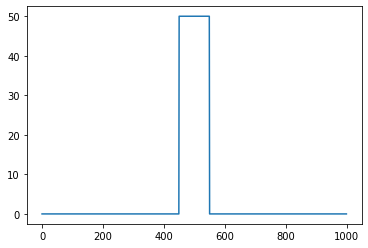

In [6]:
s = np.zeros(xlen)
i0 = xlen/2
hw = (sigma_h/2)
s[round(i0-hw/dx):round(i0+hw/dx)] = 50
plt.plot(s)

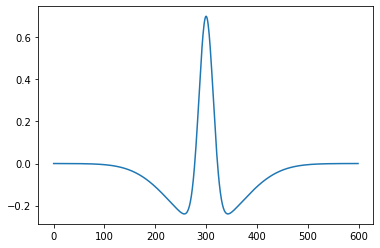

In [7]:
klen = sigma_h*3
xx = np.arange(-klen,klen,dx)

KC = K(xx,sigma_c)
KH = K(xx,sigma_h)
CS=KC-0.3*KH
plt.plot(CS)

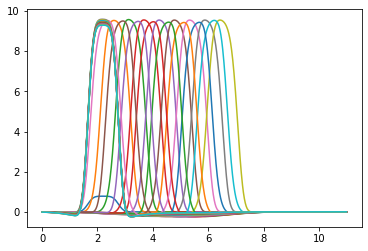

In [8]:
dt = 0.001

alpha = 80
beta = 2
k = 200
g = 1/20

pos_0 = 200.*dx
nstep = 1500
vdt =  1.*dx# moving bar velocity  #pos_0+vdt*400 <= xlen-pos0
#v = 0

y = np.zeros(xlen) # cone cell output
z = np.zeros(xlen) # horizontal cell output


speak = np.zeros(nstep)
rpeak = np.zeros(nstep)

stm = []
rsp = []
zts = []
tmp = []

for i in range(nstep):
    if i < 400:
        pos = pos_0 + vdt*i
    if i > 400 and i <800:
        pos = pos - vdt
    speak[i] = pos/dx
    
    s = np.zeros(xlen)
    s[round((pos-hw)/dx):round((pos+hw)/dx)] = 10
    rs =  np.convolve(s,KC,'same')*dx
    ry = np.convolve(y,KH,'same')*dx # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    
    for j in range(xlen):
#         if c_loc[j]:
#             dyj =(-alpha*y[j]+k*(rs[j]-z[j]))*dt
#             y[j] = y[j]+dyj
#         if h_loc[j]:
#             dzj =(-beta*z[j]+g*ry[j])*dt
#             z[j] = z[j]+dzj
            
        dyj =(-alpha*y[j]+k*(rs[j]-z[j]))*dt
        y[j] = y[j]+dyj
        dzj =(-beta*z[j]+g*ry[j])*dt
        z[j] = z[j]+dzj
    maxpos = np.argmax(y)
    rpeak[i]= maxpos
    
    stm.append(rs.copy())
    rsp.append(y.copy())
    zts.append(z.copy())
    
    if i%50 == 0:
        #plt.plot(y[maxpos-50:maxpos+50])
        plt.plot(xaxis, y)
        tmp.append(y)
        #plt.plot(rs/7)

(-1, 399)

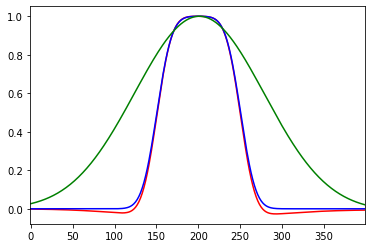

In [9]:
plt.plot(y/np.max(y),'r')
plt.plot(rs/np.max(rs),'b')
plt.plot(ry/np.max(ry),'g')

#plt.plot(z)
plt.xlim([maxpos-200,maxpos+200])

In [10]:
# activation function
def A(x,theta):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]- theta>0:
            y[i]= x[i]-theta
    return(y)

(99, 299)

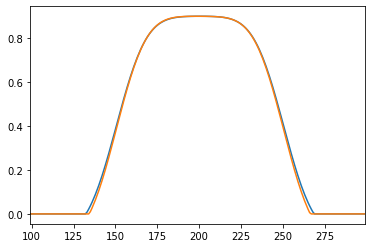

In [11]:
# shown with activatin function
rrs = rs/np.max(rs)
yy = y/np.max(y)
plt.plot(A(rrs,0.1))
plt.plot(A(yy,0.1))
plt.xlim([maxpos-100,maxpos+100])

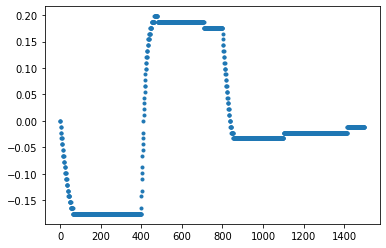

In [12]:
# difference between stimualtion and response peak
plt.plot((rpeak-speak)*dx,'.')

#plt.ylim([0,15])
#plt.xlim([350,450])

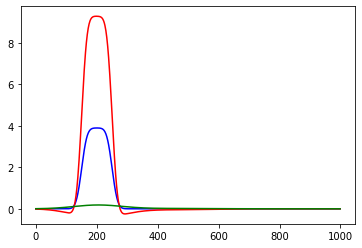

In [13]:
# spatial distribution of cells at final state
plt.plot(rs,'b') # stimualtion
plt.plot(y,'r')  # cone cell
plt.plot(z,'g')  # horizontal cell


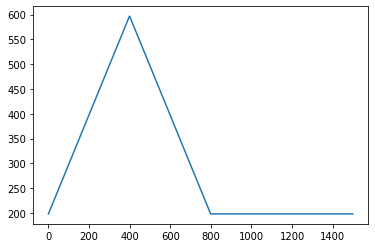

In [14]:
# distance travelled
plt.plot(speak-pos_0)

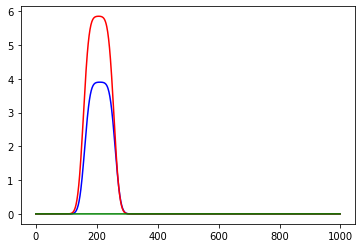

In [15]:
# snapshot at different time
index=10 # large response; weak feedback
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

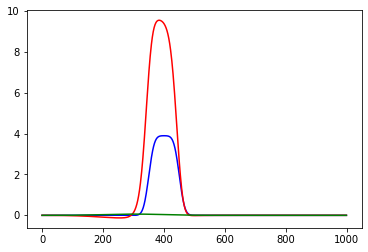

In [16]:
# snapshot at different time
index=200 # steady state, strong feedback
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

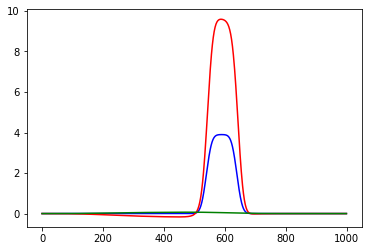

In [17]:
# snapshot at different time
index=410 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

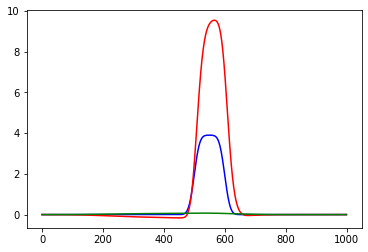

In [18]:
# snapshot at different time
index=450 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

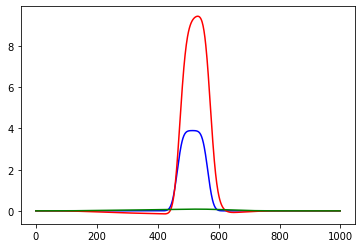

In [19]:
# snapshot at different time
index=485 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

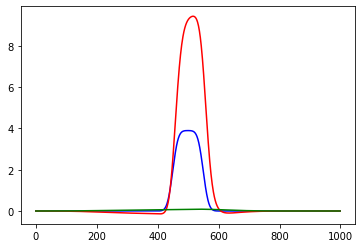

In [20]:
# snapshot at different time
index=500 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

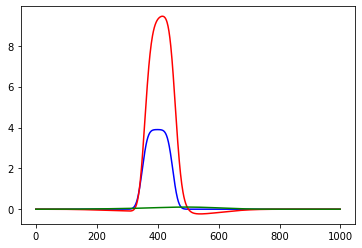

In [21]:
# snapshot at different time
index=600 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

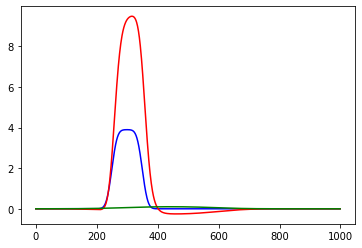

In [22]:
# snapshot at different time
index=700 # reverse direction, steady state
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

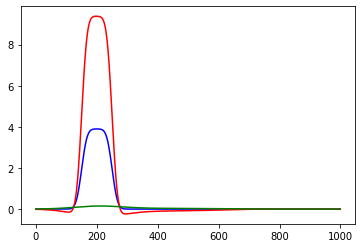

In [23]:
# snapshot at different time
index=1199 # almost stopped
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

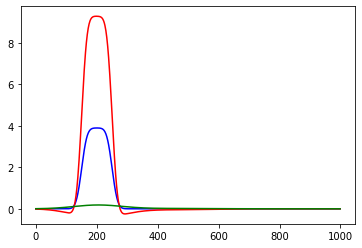

In [24]:
# snapshot at different time
index=1499 # stopped
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')